# 1. Install Dependencies

In [150]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# 2. Exploratary Data Analysis

In [151]:
data_dir = "data"

In [152]:
df = pd.read_csv(data_dir + "/train.csv")

In [153]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [155]:
df_female = df[df["Sex"] == "female"]
df_male = df[df["Sex"] == "male"]

female_survived = len(df_female[df_female["Survived"] == 1])
female_dead = len(df_female[df_female["Survived"] == 0])
male_survived = len(df_male[df_male["Survived"] == 1])
male_dead = len(df_male[df_male["Survived"] == 0])

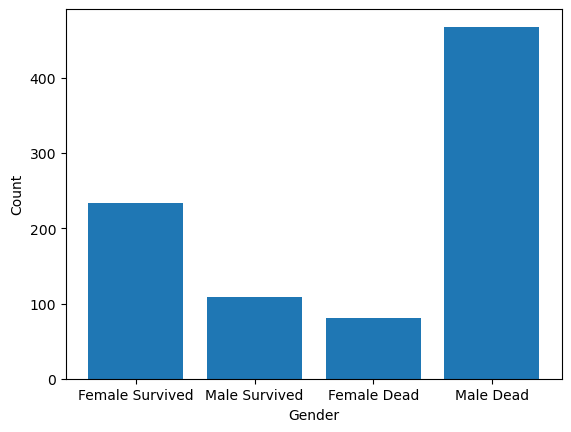

In [156]:
plt.bar(["Female Survived", "Male Survived","Female Dead", "Male Dead"], [female_survived, male_survived,female_dead, male_dead])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_4590/4272210778.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(["1st Class", "2nd Class", "3rd Class"], [len(df[df["Pclass"] == 1][df["Survived"] == 0]), len(df[df["Pclass"] == 2][df["Survived"] == 0]), len(df[df["Pclass"] == 3][df["Survived"] == 0])])
/var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_4590/4272210778.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(["1st Class", "2nd Class", "3rd Class"], [len(df[df["Pclass"] == 1][df["Survived"] == 0]), len(df[df["Pclass"] == 2][df["Survived"] == 0]), len(df[df["Pclass"] == 3][df["Survived"] == 0])])
/var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_4590/4272210778.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(["1st Class", "2nd Class", "3rd Class"], [len(df[df["Pclass"] == 1][df["Survived"] == 0]), len(df[df["Pclass"] == 2][df

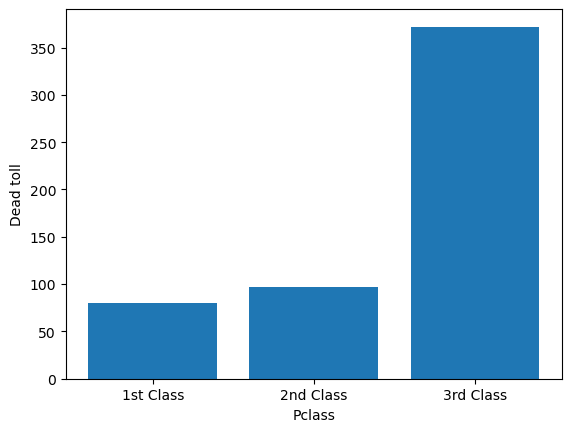

In [157]:
plt.bar(["1st Class", "2nd Class", "3rd Class"], [len(df[df["Pclass"] == 1][df["Survived"] == 0]), len(df[df["Pclass"] == 2][df["Survived"] == 0]), len(df[df["Pclass"] == 3][df["Survived"] == 0])])
plt.xlabel("Pclass")
plt.ylabel("Dead toll")
plt.show()

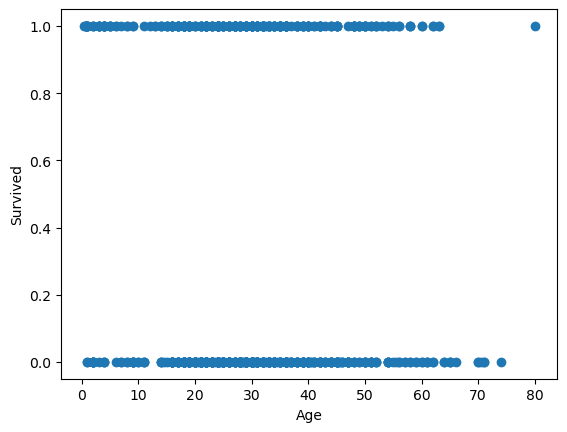

In [158]:
plt.scatter(df["Age"], df["Survived"])
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

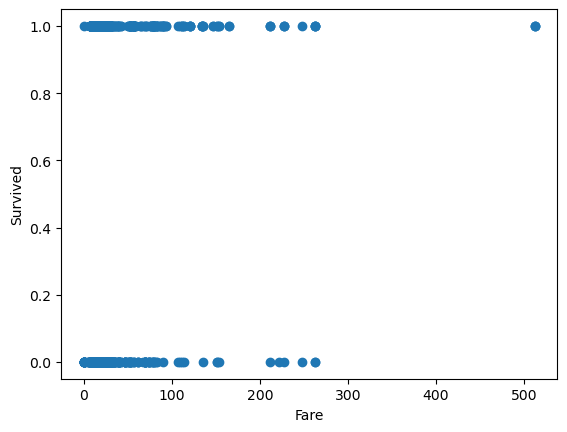

In [159]:
plt.scatter(df["Fare"], df["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

# 3. Process Data

In [160]:
def ProcessData(df, hasY = True, ):
    x_df = df.drop(columns=["PassengerId", "Name", "Ticket"])
    x_df = x_df.fillna(-1)
    if (hasY) : 
        y_df = x_df["Survived"]
        x_df = x_df.drop(columns=["Survived"])
    else:
        y_df = 0
    
    x_df['Sex'] = x_df['Sex'].replace('male', 1)
    x_df['Sex'] = x_df['Sex'].replace('female', 0)
    
    cabins = x_df["Cabin"].unique()
    x_df["Cabin"] = x_df["Cabin"].map( lambda x : np.where(cabins == x)[0][0])

    embarked = x_df["Embarked"].unique()
    x_df["Embarked"] = x_df["Embarked"].map( lambda x : np.where(embarked == x)[0][0])
    return x_df, y_df


# 4. Train Model

In [161]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [162]:
x_train, y_train = ProcessData(df)

In [163]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [164]:
model1 = LinearSVC(C=1.0, random_state=56)
model1.fit(x_train, y_train)

/Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=56)

# 5. Get Test Results

In [165]:
test_df = pd.read_csv(data_dir + "/test.csv")

In [166]:
x_test, y_test = ProcessData(test_df, False)

In [167]:
def GetTestCSV(x, m, file_name):
    x_test = scaler.transform(x)
    results = m.predict(x_test)
    output = pd.DataFrame({"PassengerId" : test_df["PassengerId"], "Survived" : results})
    output.to_csv(file_name, index=False)

In [168]:
GetTestCSV(x_test, model1, "output1.csv")

# 6. Retrain Using Different Values for NaN

In [169]:
df = pd.read_csv(data_dir + "/train.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [170]:
df_copy_1 = df.drop(columns=["PassengerId", "Name", "Ticket"])
for col in df_copy_1.columns:
    print(col + " : ")
    print(df_copy_1[col].unique())

Survived : 
[0 1]
Pclass : 
[3 1 2]
Sex : 
['male' 'female']
Age : 
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp : 
[1 0 3 4 2 5 8]
Parch : 
[0 1 2 5 3 4 6]
Fare : 
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792

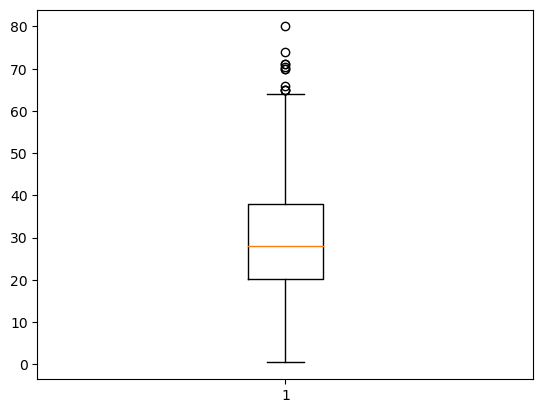

In [171]:
plt.boxplot(df["Age"].dropna())
plt.show()

### Attributes that contain null : Age, Cabin and Embarked 

In [172]:
from scipy import stats

In [173]:
def ProcessData2(df, hasY = True, ):
    x_df = df.drop(columns=["PassengerId", "Name", "Ticket"])
    temp_arr = np.array(x_df["Age"])
    temp_arr = temp_arr[~np.isnan(temp_arr)]
    
    age_array = np.sort(temp_arr)
    age_median = age_array[int((len(age_array) + 1)/ 2)]
    
    x_df["Age"] = x_df["Age"].fillna(age_median)
    if (hasY) : 
        y_df = x_df["Survived"]
        x_df = x_df.drop(columns=["Survived"])
    else:
        y_df = 0
    
    x_df['Sex'] = x_df['Sex'].replace('male', 1)
    x_df['Sex'] = x_df['Sex'].replace('female', 0)
    
    cabins = x_df["Cabin"].unique()
    x_df["Cabin"] = x_df["Cabin"].map( lambda x : np.where(cabins == x)[0][0] if pd.notna(x) else np.nan)
    
    temp_arr = np.array(x_df["Cabin"].dropna())
    mode_result = stats.mode(temp_arr, keepdims=True)  # keepdims=True prevents warning
    mode_value = mode_result.mode[0]  
    x_df["Cabin"] = x_df["Cabin"].fillna(mode_value)

    embarked = x_df["Embarked"].unique()
    x_df["Embarked"] = x_df["Embarked"].map( lambda x : np.where(embarked == x)[0][0] if pd.notna(x) else np.nan)

    temp_arr = np.array(x_df["Embarked"].dropna())
    mode_result = stats.mode(temp_arr, keepdims=True)  # keepdims=True prevents warning
    mode_value = mode_result.mode[0]  
    x_df["Embarked"] = x_df["Embarked"].fillna(mode_value)
    return x_df, y_df


In [174]:
x_train, y_train = ProcessData2(df)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
model1 = LinearSVC(C=1.0, random_state=56)
model1.fit(x_train, y_train)

/Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=56)

In [175]:
GetTestCSV(x_test, model1, "output2.csv")

# 7. Try Using Different Model

In [186]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=6)
model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [187]:
GetTestCSV(x_test, model2, "output3.csv")